In [2]:
!pwd

/home/oleg/projects/ML/OWL-ViT


In [ ]:
# Разные размеры Owl-ViT
models = [
    "google/owlvit-base-patch32",    # 👈 Ты используешь эту
    "google/owlvit-base-patch16",    # Больше деталей
    "google/owlvit-large-patch14",   # Самая точная
]

# Загрузка
from transformers import OwlViTProcessor, OwlViTForObjectDetection
processor = OwlViTProcessor.from_pretrained("google/owlvit-large-patch14")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-large-patch14")

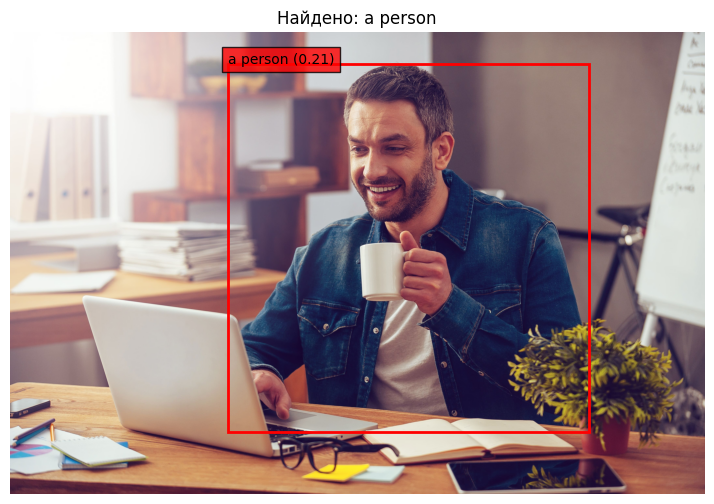

In [8]:
# САМЫЙ ПРОСТОЙ КОД
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt

def simple_owl_detection(image_path, what_to_find):
    """Простая версия Owl-ViT"""
    
    # Загружаем модель (автоскачается)
    processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
    model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")
    
    # Загружаем изображение
    image = Image.open(image_path)
    
    # Текстовые запросы
    texts = [[what_to_find]]
    
    # Обработка
    inputs = processor(text=texts, images=image, return_tensors="pt")
    outputs = model(**inputs)
    
    # Результаты
    target_sizes = torch.Tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.2)
    
    # Рисуем
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    
    for box, score, label in zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"]):
        if score > 0.2:
            x1, y1, x2, y2 = box.tolist()
            
            # Прямоугольник
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                            linewidth=2, edgecolor='red', facecolor='none'))
            # Подпись
            plt.text(x1, y1-5, f"{what_to_find} ({score:.2f})", 
                    bbox=dict(facecolor='red', alpha=0.8), fontsize=10)
    
    plt.axis('off')
    plt.title(f"Найдено: {what_to_find}")
    plt.show()

# Использование
simple_owl_detection(
    "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
    "a person"
)


=== ПРИМЕР 3: Промт ===
🦉 Загружаем Owl-ViT...
🔍 Ищем: ['a plant', ' a book']


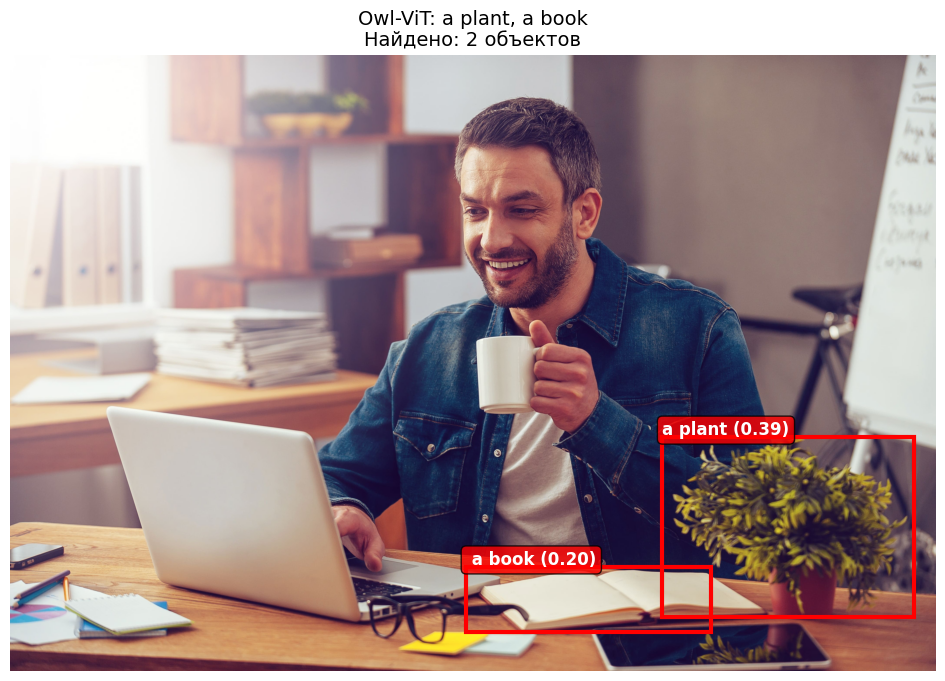

✅ Найдено объектов: 2


In [12]:
# pip install transformers pillow
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt

def owl_vit_detection(image_path, text_prompts):
    """Owl-ViT - текстовая детекция от Google"""
    
    print("🦉 Загружаем Owl-ViT...")
    
    # Загружаем модель и процессор
    processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
    model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")
    
    # Загружаем изображение
    image = Image.open(image_path)
    
    # Текстовые запросы (разделяем по запятой)
    texts = [text_prompts.split(",")]  # ["a person", "a laptop", "a cup"]
    
    print(f"🔍 Ищем: {texts[0]}")
    
    # Обрабатываем
    inputs = processor(text=texts, images=image, return_tensors="pt")
    outputs = model(**inputs)
    
    # Получаем предсказания
    target_sizes = torch.Tensor([image.size[::-1]])
    results = processor.post_process_object_detection(
        outputs=outputs, target_sizes=target_sizes, threshold=0.1
    )
    
    # Рисуем результат
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    
    found_count = 0
    
    for i, (boxes, scores, labels) in enumerate(zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"])):
        if scores > 0.2:  # Порог уверенности
            box = boxes.tolist()
            label = texts[0][labels]
            
            # Рисуем bbox
            rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                               linewidth=3, edgecolor='red', facecolor='none')
            plt.gca().add_patch(rect)
            
            plt.text(box[0], box[1]-10, f"{label} ({scores:.2f})",
                    fontsize=12, fontweight='bold', color='white',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.8))
            
            found_count += 1
    
    plt.axis('off')
    plt.title(f"Owl-ViT: {text_prompts}\nНайдено: {found_count} объектов", fontsize=14)
    plt.show()
    
    print(f"✅ Найдено объектов: {found_count}")

# 🎯 ПРИМЕРЫ ИСПОЛЬЗОВАНИЯ:

# print("=== ПРИМЕР 1: Человек и ноутбук ===")
# owl_vit_detection(
#     "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
#     "a person, a laptop, a cup"
# )

# print("\n=== ПРИМЕР 2: Только человек ===")
# owl_vit_detection(
#     "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
#     "a person"
# )

print("\n=== ПРИМЕР 3: Промт ===")
owl_vit_detection(
    "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
    "a plant, a book"
)

In [1]:
# pip install transformers
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import torch

def owl_vit_detection(image_path, text_prompts):
    """Owl-ViT - текстовоя детекция от Google"""
    
    print("🦉 Загружаем Owl-ViT...")
    
    # Загружаем модель и процессор
    processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
    model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")
    
    # Загружаем изображение
    image = Image.open(image_path)
    
    # Текстовые запросы
    texts = [text_prompts.split(",")]  # ["a photo of a person", "a photo of a cup"]
    
    # Обрабатываем
    inputs = processor(text=texts, images=image, return_tensors="pt")
    outputs = model(**inputs)
    
    # Получаем предсказания
    target_sizes = torch.Tensor([image.size[::-1]])
    results = processor.post_process_object_detection(
        outputs=outputs, target_sizes=target_sizes, threshold=0.1
    )
    
    # Рисуем результат
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    
    for i, (boxes, scores, labels) in enumerate(zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"])):
        if scores > 0.2:  # Порог уверенности
            box = boxes.tolist()
            label = texts[0][labels]
            
            # Рисуем bbox
            rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                               linewidth=3, edgecolor='red', facecolor='none')
            plt.gca().add_patch(rect)
            
            plt.text(box[0], box[1]-10, f"{label} ({scores:.2f})",
                    fontsize=12, fontweight='bold', color='white',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.8))
    
    plt.axis('off')
    plt.title(f"Owl-ViT: {text_prompts}", fontsize=14)
    plt.show()

# Использование Owl-ViT
owl_vit_detection(
    "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
    "a person, a laptop, a cup"
)

2025-10-29 15:19:58.154118: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-29 15:19:58.757883: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-29 15:20:00.559776: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


🦉 Загружаем Owl-ViT...


preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

NameError: name 'Image' is not defined